**CUSTOMER CHURN PREDICTION**

**MOUNTING THE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**IMPORTING LIBRARIES AND DATASET**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Load a CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/archive.zip')


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**DATA PREPROCESSING**

In [ ]:
# Drop the 'customerID' column
df = df.drop('customerID', axis=1)

In [ ]:

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Convert 'TotalCharges' to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# The 'errors' parameter is set to 'coerce' to handle any non-numeric values by converting them to NaN.

# Now, you can access the converted 'TotalCharges' column as floats:
print(df['TotalCharges'])

# If you want to replace NaN values with a specific value, you can do so, for example:
# df['TotalCharges'].fillna(0, inplace=True)


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [ ]:
# Remove rows with NaN values in the 'TotalCharges' column
df.dropna(subset=['TotalCharges'], inplace=True)


In [ ]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**SPLITING THE CHURN INTO YES & NO**

In [ ]:
# Filter rows where 'Churn' is 'Yes'
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [ ]:
# Filter rows where 'Churn' is 'No'
churn_no = df[df['Churn'] == 'No']['tenure']

churn_no


0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

**RELATION OF CHURNS WITH TENURE**

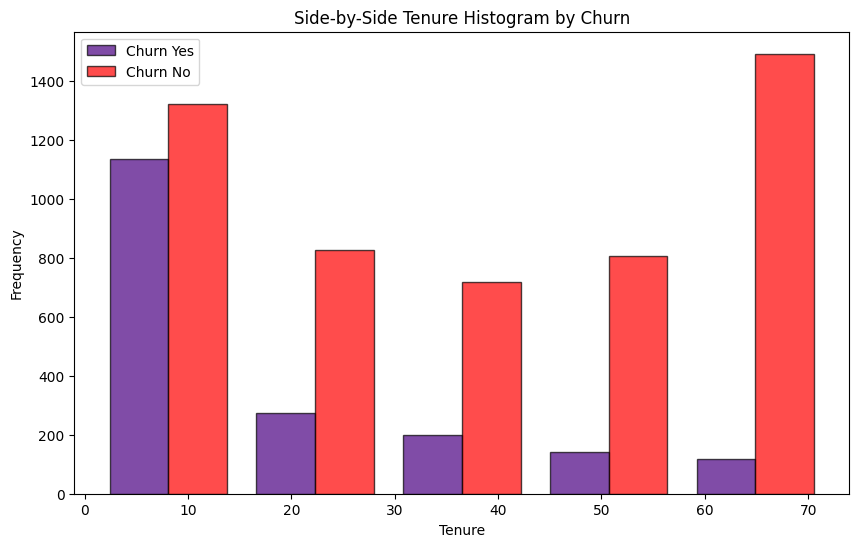

In [ ]:

# Create side-by-side histograms
plt.figure(figsize=(10, 6))
plt.hist([churn_yes, churn_no], bins=5, edgecolor='black', alpha=0.7, color=['indigo', 'red'], label=['Churn Yes', 'Churn No'], stacked=False)
plt.title('Side-by-Side Tenure Histogram by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

**RELATION OF MONTHLYCHARGES WITH CHURN**

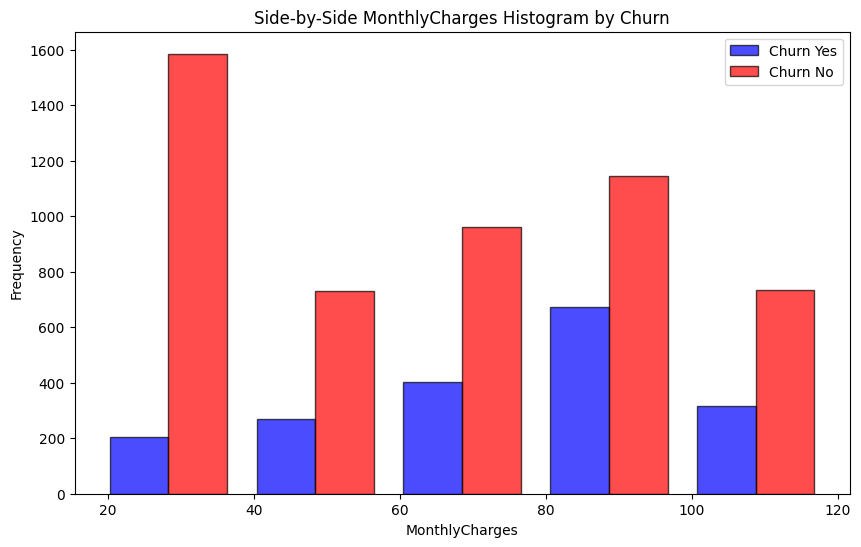

In [ ]:
# Separate 'MonthlyCharges' values for Churn 'Yes' and 'No'
churn_yes_monthly_charges = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no_monthly_charges = df[df['Churn'] == 'No']['MonthlyCharges']

# Create side-by-side histograms for MonthlyCharges
plt.figure(figsize=(10, 6))
plt.hist([churn_yes_monthly_charges, churn_no_monthly_charges], bins=5, edgecolor='black', alpha=0.7, color=['b', 'r'], label=['Churn Yes', 'Churn No'], stacked=False)
plt.title('Side-by-Side MonthlyCharges Histogram by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

**LABEL ENCODING OF CATOGERIAL COLUMNS**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the encoded DataFrame
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**STANDARD SCALING OF THE DATA**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
# Select only the numerical columns for scaling
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

# Initialize StandardScaler and MinMaxScaler
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Standardize the numerical columns
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.440327,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,29.85,0
1,1,-0.440327,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,1889.50,0
2,1,-0.440327,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,108.15,1
3,1,-0.440327,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,1840.75,0
4,0,-0.440327,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,151.65,1


**SPLITING THE COLUMNS INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**APPLYING ANN MODEL**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
# Build the ANN model with additional hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(8, activation='relu'),   # Additional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
176/176 [==============================] - 7s 6ms/step - loss: 1.0376 - accuracy: 0.7038 - val_loss: 0.5249 - val_accuracy: 0.7726
Epoch 2/50
176/176 [==============================] - 1s 5ms/step - loss: 0.7531 - accuracy: 0.7346 - val_loss: 0.6275 - val_accuracy: 0.6496
Epoch 3/50
176/176 [==============================] - 1s 7ms/step - loss: 0.5967 - accuracy: 0.7584 - val_loss: 0.5600 - val_accuracy: 0.7818
Epoch 4/50
176/176 [==============================] - 1s 7ms/step - loss: 0.6307 - accuracy: 0.7559 - val_loss: 0.4651 - val_accuracy: 0.7832
Epoch 5/50
176/176 [==============================] - 1s 7ms/step - loss: 0.5685 - accuracy: 0.7705 - val_loss: 0.7694 - val_accuracy: 0.5529
Epoch 6/50
176/176 [==============================] - 1s 5ms/step - loss: 0.5644 - accuracy: 0.7767 - val_loss: 0.5659 - val_accuracy: 0.7825
Epoch 7/50
176/176 [==============================] - 1s 5ms/step - loss: 0.5377 - accuracy: 0.7737 - val_loss: 0.4560 - val_accuracy: 0.7868
Epoch 

**MODEL EVALUATION**

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

44/44 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7797
Test Accuracy: 77.97%


**PLOTING CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

44/44 [==============================] - 0s 2ms/step


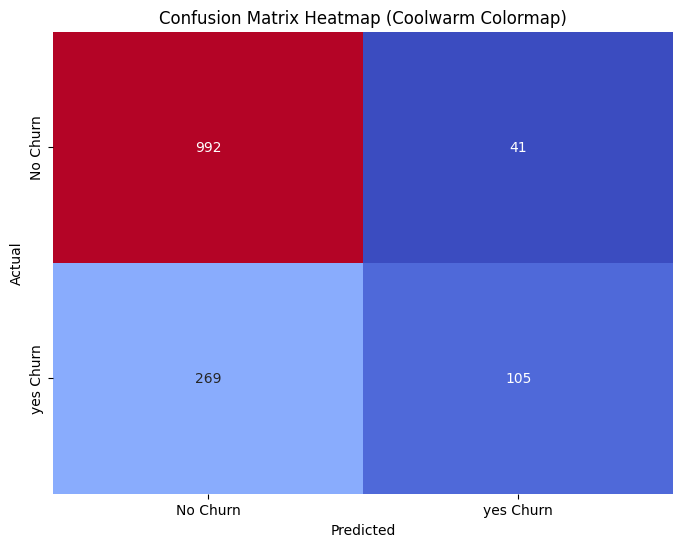

In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap for the confusion matrix using the 'coolwarm' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['No Churn', 'yes Churn'], yticklabels=['No Churn', 'yes Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Coolwarm Colormap)')
plt.show()





In [ ]:
# Generate and display a classification report
report = classification_report(y_test, y_pred_binary, target_names=['No Churn', 'yes Churn'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.79      0.96      0.86      1033
   yes Churn       0.72      0.28      0.40       374

    accuracy                           0.78      1407
   macro avg       0.75      0.62      0.63      1407
weighted avg       0.77      0.78      0.74      1407

